### **Breast Cancer Detection model** 




Traditionally one of the main ways to diagnose a tumor is to take a biopsy of breast mass and then visually examine the cell nuclei under a microscope. Then a pathologist or other specialized professional determines whether the cell is metastasic or not.

As we understand it, you wish to use a model that can help diagnose breast cancer through digitized image. Here we present to you a prototype of the breast cancer detection model, trained by the Wisconsin Breast Cancer dataset. 
> The dataset features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. Which is used to describe the cell characteristics.

The final model utilises logistic regression algorithm and offers diagnosis recommendation based on 9 features. Our model evaluation shows a 99.3% accuracy, 98% sensitivity and 100% specificity. 


**Chapter 1: 
 Data First Glance**

---
In this chapter, we offer you some insight into the Breast cancer Dataset provided by Winsconson State University. 

---
Attribute Information:
*   ID number
*   Diagnosis (M = malignant, B = benign)
*   30 Features


Ten real-valued features are computed for each cell nucleus:
1.   Area
2.   texture (standard deviation of gray-scale values)
1.   Perimetre
1.   Smoothness
1.   compactness (perimeter^2 / area - 1.0)
1.   Concavity (severity of concave portions of the contour)
2.   Oncave points (number of concave portions of the contour)
2.   Symmetry
2.   Fractal dimension
1.   Radius 

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [0]:
# import the libraries we are going to use
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
import numpy as np

In [0]:
# If you didn't find the below:
# df = pd.read_csv('/content/drive/My Drive/CFG Team 1/data/data.csv')
# df = df.drop(['Unnamed: 32','id'],axis = 1)

In [0]:
#load the dataset and make it close to identical to theh dataset given
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

data = np.c_[ cancer.target, cancer.data]
columns = np.append(['diagnosis'], cancer.feature_names)
df = pd.DataFrame(data, columns = columns)

#This code was used to replace the diagnosis from binary to descriptive i.e 1 = Benign 
df['diagnosis'] = df['diagnosis'].replace(1.0, 'B')
df['diagnosis'] = df['diagnosis'].replace(0.0, 'M')

A sneakpeak into the dataset: We can see that we have 31 rows, which is inclusive of row 0 'Diagnosis', as well as the real valued features of the cancer cells in the first 5 samples.

In [143]:
 df.head(5)

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [144]:
# Basic data information, 31 rows of features (and diagnosis) and 569 samples
df.shape

(569, 31)

In [145]:
#Describing all 31 rows of the data
df.describe(include = 'all')

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [146]:
#checking if there's any True for any NA values
df.isna().any().any()

False

There are no NA values in our dataset.

**Chapter 2: Categorising and Analysising the Data**





Now we have explored our data and cleaned it, we now will move onto data visualisation and analysis. 

In [147]:
# count how many 'M' and 'B' 
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

It's a relatively balanced dataset.

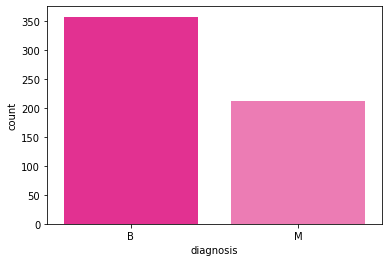

In [148]:
# Bar chart showing the number of benign and malignant tumours in the data set
sns.countplot(df['diagnosis'], label="Count", palette=sns.color_palette(['#FF1493', '#FF69B4']),
              order=pd.value_counts(df['diagnosis']).iloc[:17].index)
plt.show()

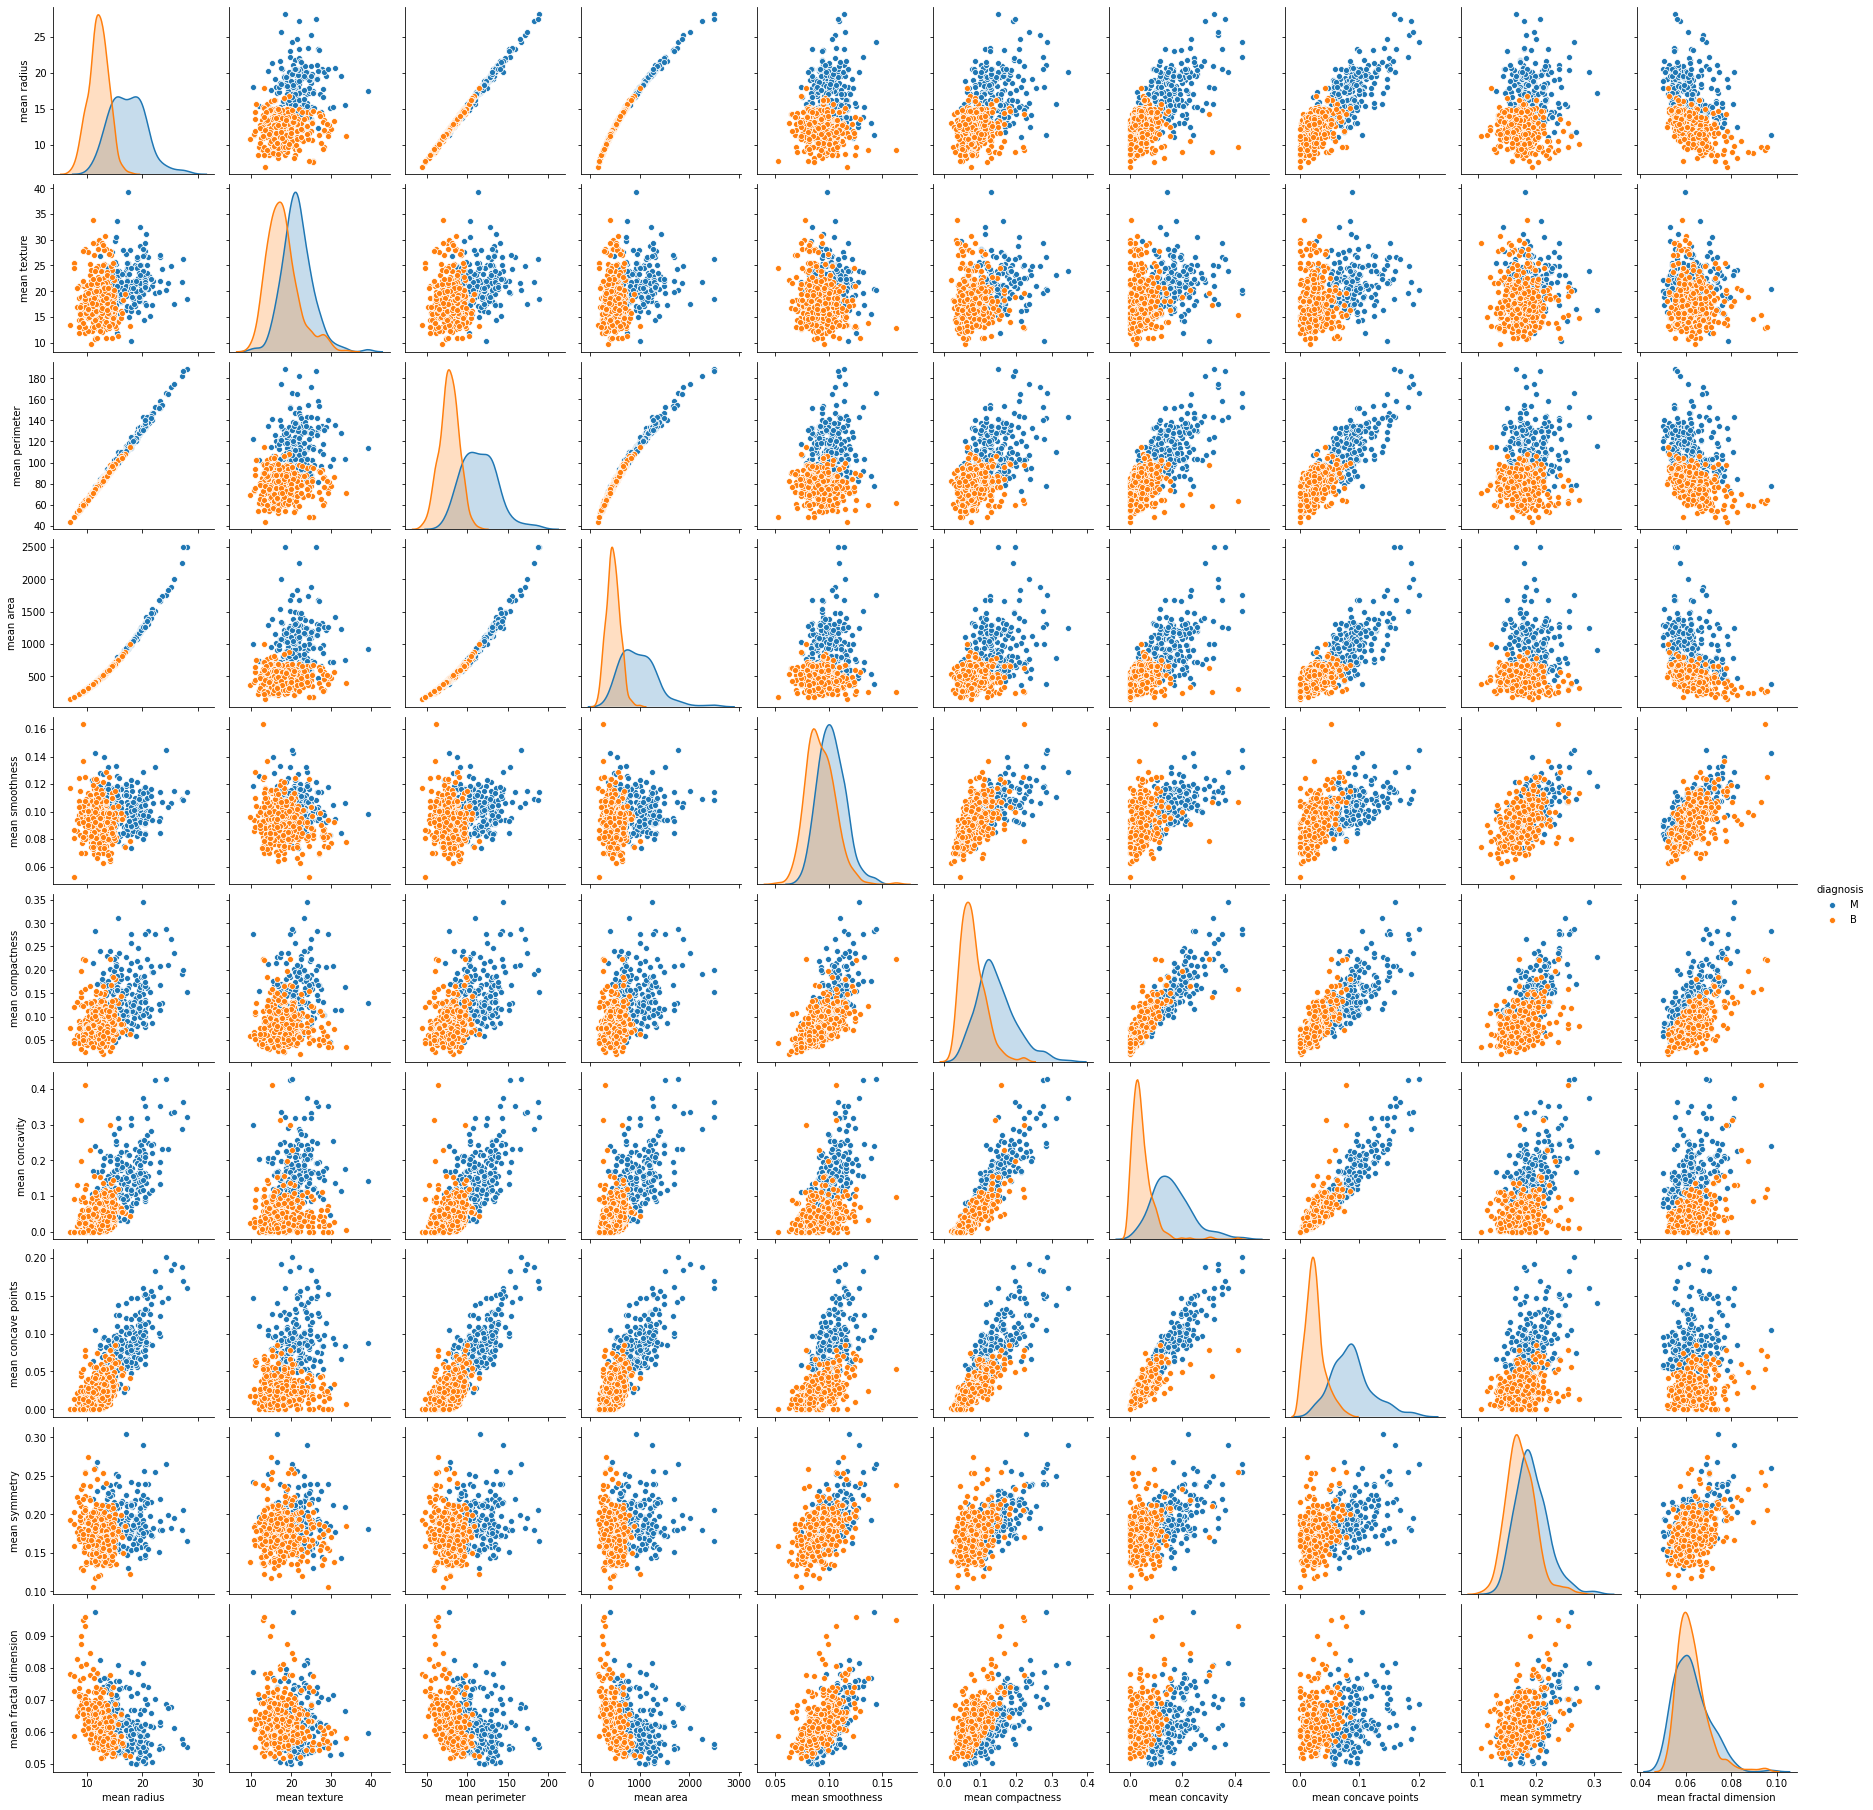

In [149]:
# here we can get an overview using pairplots
sns.pairplot(df.iloc[:,:11], hue = 'diagnosis')

**Observation:**

The radius, parameter and area are highly correlated, as well as compactness, concavity and concave point means. This is to be expected as these are features highly related to eachother


Pairplots showing very few outliers

---



In [0]:
# Build a simpler and less saturated correlation matrix
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:1201: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


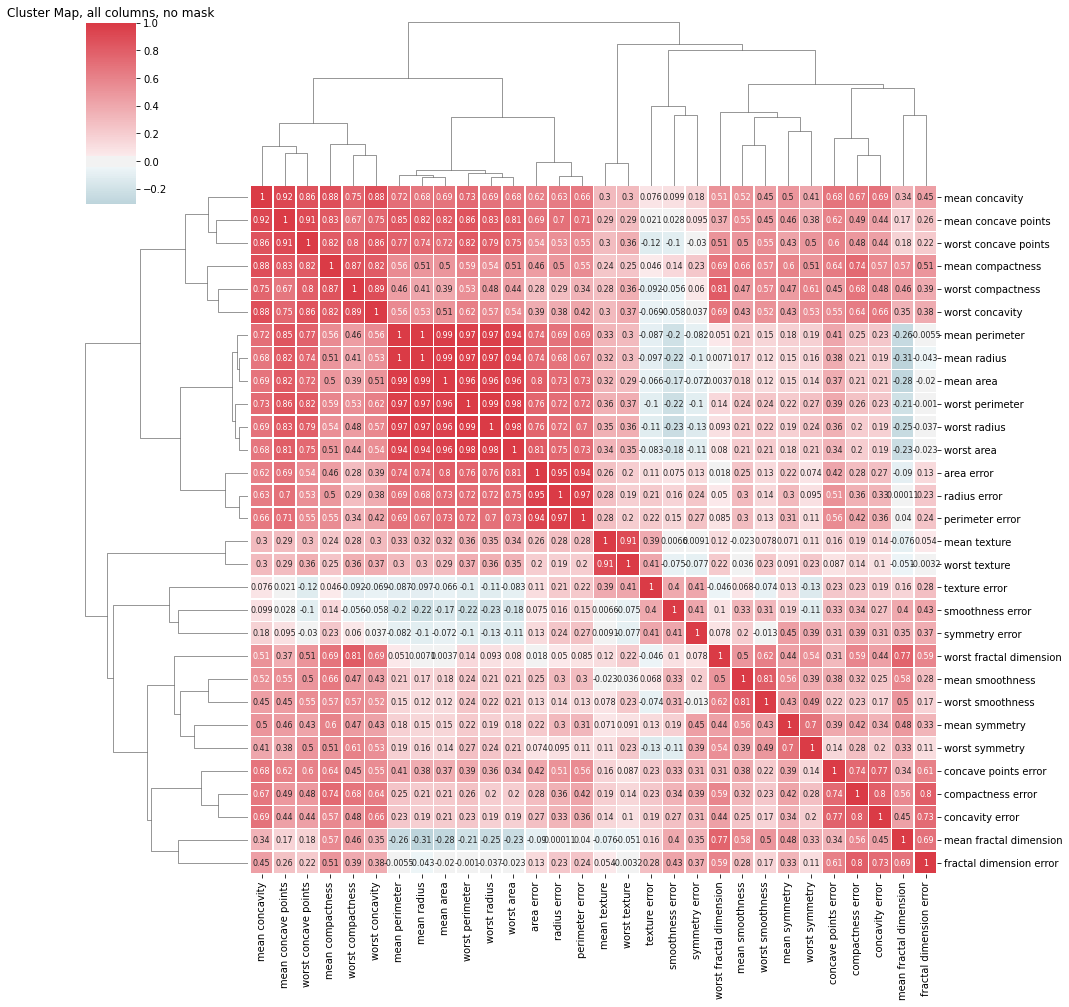

In [151]:
# Cluster Heatmap of the correlation matrix
sns.clustermap(corr, figsize = (14, 14), cmap=cmap, annot = True, annot_kws={'size':8}, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Cluster Map, all columns, no mask')
plt.savefig('df_cluster_whole_nmask.png')



---


The below correlation heatmap takes into account it calculates the feature correlation with malignant cases and the feature correlation with Benign cases. 

An absolute value is derived thereby if there's a large positive number it means the correlation betweent the two features involved changes on the diagnosis.





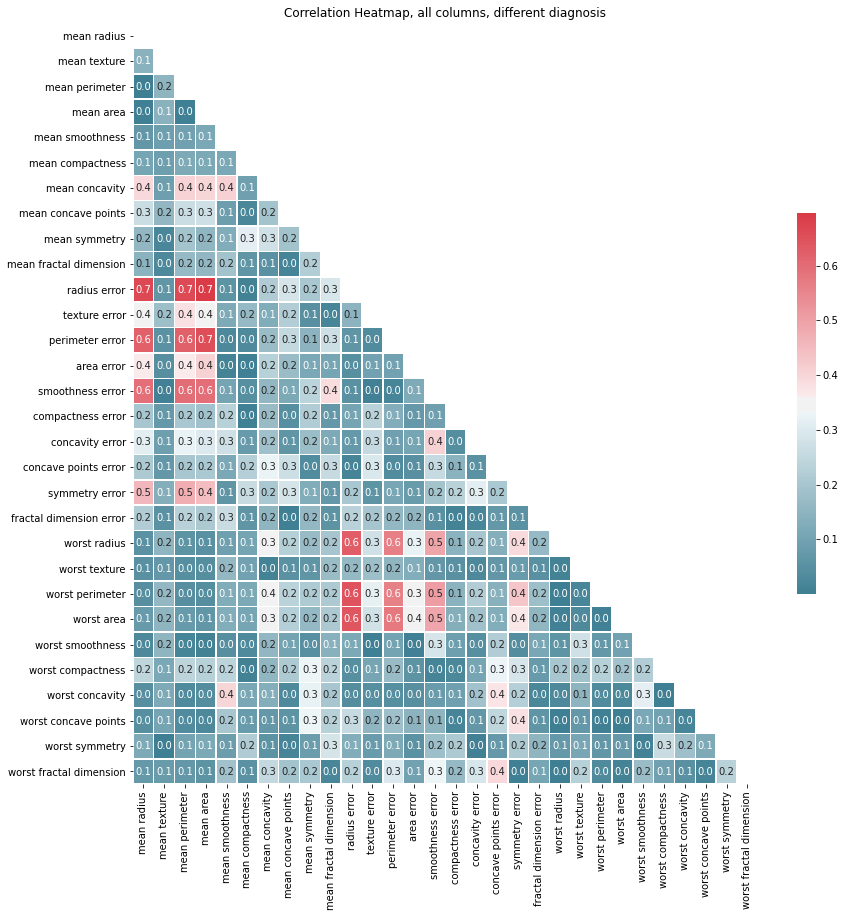

In [152]:
# Build a correlation difference matrix
corr_m = df[df['diagnosis'] == 'M'].corr()
corr_b = df[df['diagnosis'] == 'B'].corr()
corr_df = abs(corr_m - corr_b)
f,ax=plt.subplots(figsize = (14,14))
sns.heatmap(corr_df, cmap = cmap, mask = mask, annot= True,linewidths=0.5,fmt = ".1f",ax=ax, cbar_kws={"shrink": .5})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap, all columns, different diagnosis')
plt.savefig('df_corr_df.png')



---


A clearer heatmap with the biggest differences

['mean radius', 'mean perimeter', 'mean area', 'radius error', 'perimeter error', 'smoothness error', 'worst radius', 'worst perimeter', 'worst area']


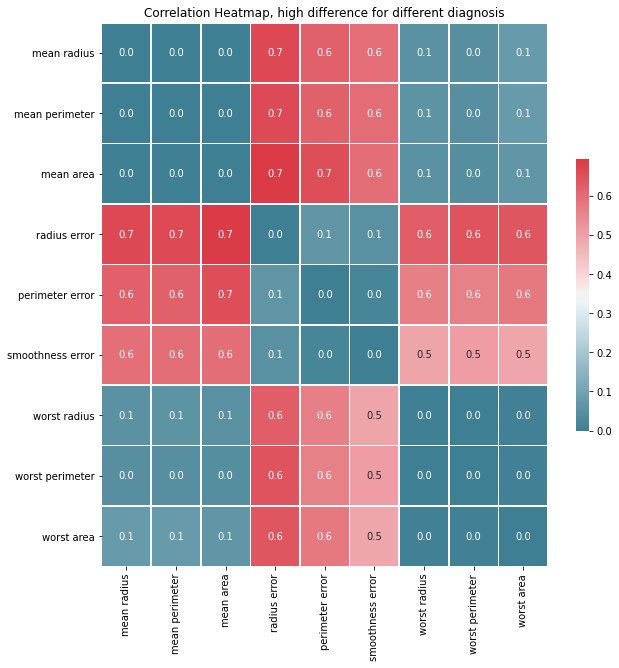

In [153]:
corr_df_high = corr_df[corr_df > 0.5] #Can change selection creteria
corr_df_high = corr_df_high.replace(1 , np.nan)
corr_df_high = corr_df_high.dropna(how = 'all', axis = 0).dropna(how = 'all', axis = 1)
columns_high_corr = list(corr_df_high.columns)
print(columns_high_corr)
corr_df_high_sel = corr_df[columns_high_corr].transpose()[columns_high_corr]

f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(corr_df_high_sel, cmap = cmap, annot= True,linewidths=0.5,fmt = ".1f",ax=ax, cbar_kws={"shrink": .5})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap, high difference for different diagnosis')
plt.savefig('df_corr_df_high.png')

From this analysis we can identify which features should be kept because their correlation are subsceptive to changes with diagnosis outcome

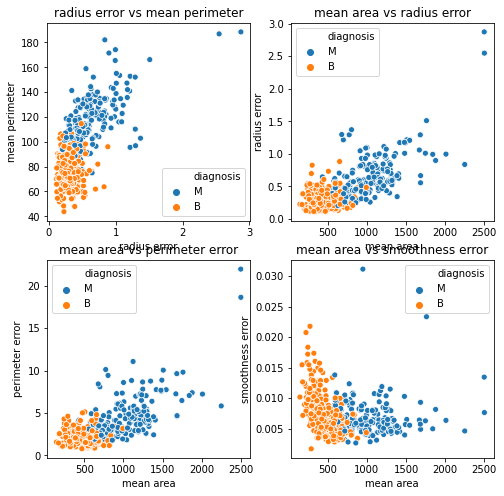

In [154]:
fig = plt.figure(figsize=(8,8))
def scatter_plot(input1,input2,k):
    plt.subplot(k)
    sns.scatterplot(x = df[input1], y = df[input2], hue = "diagnosis",
                    data = df)
    plt.title(input1 + ' vs ' + input2)
    k+=1

scatter_plot('radius error','mean perimeter',221)   
scatter_plot('mean area','radius error',222)   
scatter_plot('mean area','perimeter error',223)   
scatter_plot('mean area','smoothness error',224)

**Chapter 3: Scaling**

Now we split the data into independent (X) and dependent (Y) categories. 

Y is the diagnosis if the patient has a malignant or benign tumour 

X are the features that will help us determine if the patient's tumour is malignant or benign.


In [0]:
# The data we use is split into training data and test data. 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df.iloc[:, 1:31]
Y = df.iloc[:, 0]

Here we split the data into 75% training and 25% testing by convention. The training data is known for the model to learn from. The test data is to test the trained model. 

Before we get started on the model selection we need to make sure the orders of magnitude are consistent for all data sets. 
> This is really important in machine learning and is one of the most critical steps in the pre-processing stage of creating a model. This is especially important in K-nearest neighbours models which we will touch on later.




In [0]:
#Define a function to create train/test data with features and test_size input.
#X is the features, Y is the categorical output; both dataframe
#drop_column, a list of columns to be drpped
#test_size, % of original dataset used as the test set
#output dset is a list of dataframes
def Dataset(X, Y, drop_column = [], test_size = 0.25):
  if len(drop_column) != 0:
    X = X.drop(drop_column, axis = 1)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = 0)
  #Scaling
  X_train = pd.DataFrame(sc.fit_transform(X_train), columns= X.columns)
  X_test = pd.DataFrame( sc.transform(X_test), columns = X.columns)
  dset = [X_train, X_test, Y_train, Y_test]
  return dset

**Chapter 4:** **Models** 

**4.1 Model Selection**

> When deciding if a problem involves a regression or classification model the first thing you should decide is is your target variable a quantity, a probability of a binary category or a label? If it is a quantity or probability then you should use a regression model. Otherwise you should consider a classification model. 

Here we have labels for the different diagnostics of the tumor, whether is is malignant or benign. So we use classification models.

**4.1.1 Logistic Regression**

*  Logistic regression is a popular algorithm to solve a classification problem. It is a simple model for binary dependent variables, so when the label falls into one of two categories (i.e. Malignant or Benign in our case). It models the probablility that Y belongs to a particular category. 

*  Here it is a good model to use as the output is easy to interpret and it works where we have a clear hypothesis about what to solve, so in our situation whether it is cancerous or not. Although the name makes it sound like a regression model it is called this as its underlying technique is the same as linear regression.

In [0]:
from sklearn.linear_model import LogisticRegression

def LR_f(X_train, Y_train):
  LR = LogisticRegression(random_state = 0)
  LR.fit(X_train, Y_train)
  return LR

**4.1.2 Decision Tree**

*  Decision trees are a systematic approach to create a model that predicts the value of the chosen target variable (i.e. Malignant or Benign) by learning some simple decision rules inferred from the data features for example the area, smoothness and concavity of the tumour. 
*  These features make it a good model for this project. 

In [0]:
from sklearn.tree import DecisionTreeClassifier

def DTC_f(X_train, Y_train):
  DTC = DecisionTreeClassifier(criterion= 'entropy', random_state = 0)
  DTC.fit(X_train, Y_train)
  return DTC

**4.1.3 Random Forest**

*  Random Forest consists of a large number of individual decision trees acting together as an ensemble. They perform very well for classification and do not need selecting the features beforehand. 
*  This works in that a large number of trees operating together will outpreform the individual models. (Bagging)
*  Limitation: lack of explanability.

In [0]:
from sklearn.ensemble import RandomForestClassifier

def RFC_f(X_train, Y_train, n_estimators = 5):
  RFC = RandomForestClassifier(n_estimators = n_estimators, criterion = 'entropy', random_state = 0)
  RFC.fit(X_train, Y_train)
  return RFC

**4.1.4 Support Vector Machines**

*  Support Vector Machines (SVMs) are a set of supervised learning methods. The objective is to find a hyperplane in an N-demensional space that can distinctly classify the data points. 

In [0]:
from sklearn.svm import SVC

def SVC_f(X_train, Y_train):
  SV = SVC(kernel = 'linear',random_state = 0)
  SV.fit(X_train, Y_train)
  return SV

**4.1.5 Nearest Neighbour**

*  K-Nearest neighbour is generally used for data which can cluster well as it assumes that similar things exist in close proximity. It might not be very effective for classifications of more complex decision boundaries. 
*  In this example you can say that this is a malignant cell, because it looks similar to those k other malignant cells

In [0]:
from sklearn.neighbors import KNeighborsClassifier

def NN_f(X_train, Y_train, n_neighbors = 5):
  NN = KNeighborsClassifier(n_neighbors = n_neighbors, metric = 'minkowski', p = 2)
  NN.fit(X_train, Y_train)
  return NN


**4.1.6 Other Models**

We considered using a Naive Bayes model. This has the assumption that different features are totally uncorrelated, which seems not to be the case for this problem as we have correctly identified in the Data Evaluation section above, hence we decided against it.

**4.1.7 Function Dict**

To avoid unnecessary duplication of code, we define a dictionary containing each of these models. We also define a function used in training the models. 

In [0]:
# dictionary definition
SKL_func = {
    'LR': LR_f,
    'DTC': DTC_f,
    'RFC': RFC_f,
    'SVC': SVC_f,
    'NN': NN_f
}
model = list(SKL_func.keys())

**4.2 Model Evaluation**

**4.2.1 Accuracy Score**

We validated our models by comparing the accuaracy between them.

Accuracy is one metric used in evaluating classification models. It is the number of correct predictions out of the total number of predictions. 

TP + TN / (TP + TN + FP + FN)

In [0]:
#m: model name, choose from list 'Model'
#model_op: a dictionary to store the trained models, if not desired, type {}
#DSet: dataset containing X_train, X_test, Y_train, Y_test dataframes
#Output a list of train score and test score with 4 decimal points accuracy

def train_model_score(m, DSet, test_size = 0.25):
  [X_train, X_test, Y_train, Y_test] = DSet
  model_op = SKL_func[m](X_train, Y_train)
  train_score = format(model_op.score(X_train, Y_train), '.4f')
  test_score = format(model_op.score(X_test, Y_test), '.4f')  
  return [train_score, test_score], model_op

In [0]:
#Testing if the output works
 DSet = Dataset(X, Y)
 [X_train, X_test, Y_train, Y_test] = DSet

In [165]:
# result [train set accuracy, test set accuracy]
score_base = {
}

# Store the trained model output
trained_models_base = {
}
for m in model:
  [score_base[m], trained_models_base[m]] = train_model_score(m, DSet)
pd.DataFrame.from_dict(score_base, orient= 'index', columns = ['Train Score', 'Test Score'])

,Train Score,Test Score
LR,0.9906,0.9580
DTC,1.0000,0.9580
RFC,0.9906,0.9510
SVC,0.9859,0.9720
NN,0.9742,0.9510


In [0]:
#Models Output
# for a, val in trained_models_base.items():
#   print(a, val)

**4.2.2 Confusion Matrix**

The confusion matrix is a way of tabulating the number of misclassifications, i.e., the number of predicted classes which ended up in a wrong classification based on the true classes. It is a method of determining the accuracy of the models.
```
Confusion Matrix

[[TN, FP],
[FN, TP]]
```


In [0]:
# use a confusion matrix to test model accuracy

from sklearn.metrics import confusion_matrix
def Confusion_f (model_op):
  accuracy_op = {}
  for m in model_op.keys():
    conf_matrix = confusion_matrix(Y_test, model_op[m].predict(X_test))
    print(conf_matrix)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FN = conf_matrix[1][0]
    FP = conf_matrix[0][1]
    accuracy_op[m] = format((TP + TN)/(TP + TN + FP + FN), '.4f')
    print(str(m) + ' Accuracy = ', accuracy_op[m])
    # print("TP",TP)
    # print("TN",TN)
    # print("FP",FP)
    # print("FN",FN)
  return accuracy_op
  

In [168]:
# confirm the accuracy score equals TP + TN / total
accuracy_op = Confusion_f(trained_models_base)

[[87  3]
 [ 3 50]]
LR Accuracy =  0.9580
[[86  4]
 [ 2 51]]
DTC Accuracy =  0.9580
[[84  6]
 [ 1 52]]
RFC Accuracy =  0.9510
[[88  2]
 [ 2 51]]
SVC Accuracy =  0.9720
[[89  1]
 [ 6 47]]
NN Accuracy =  0.9510


The above confimrs the definiation of accuracy:

> Say for example the accuracy for logistic regression is 96% then on the surface this seems quite high. Consider a case where there are 143 patients in total, 90 are benign (87 TN and 3 FP) and 53 are malignant (50 TP and 3 FN). 

> Out of the 90 benign tumours we have correctly identified 87 which is pretty good and for the 53 malignant tumours the model correctly identified 50.

> However, 3 patients with cancer is going undiagnosed.
> And 3 patients without cancer will be put though cancer treatment.(usually very harmful)

**Clearly, accuracy alone doesn't paint the full picture. We introduce below other methods to evaluate the model performance. Particulary identify the risk of false positive and false negatives**

**4.2.3 Classification Report**

To look into other metircs, we've leveraged sklearn library's classification report to evaluate our model:

*  'Precision' [TP / (TP + FP)] is a good measure to determine when the costs of false positive in a confusion matrix is too high. This can show what proportion of positive identifications was actually right. 
*  'Recall' [TP / (TP +FN)] can help also, which shows the proportion of actual positives that were identified correctly.
*  The f1-score as a weighted average of the precision and recall.
*  The support is the number of occurrences of each class in the target variables 

In [169]:
# Another method
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Logistic Regression")
print(classification_report(Y_test, trained_models_base['LR'].predict(X_test)))
print("Decision Tree")
print(classification_report(Y_test, trained_models_base['DTC'].predict(X_test)))
print("Random Forest")
print(classification_report(Y_test, trained_models_base['RFC'].predict(X_test)))
print("Standard Vector Machine")
print(classification_report(Y_test, trained_models_base['SVC'].predict(X_test)))
print("K-Nearest Neighbour")
print(classification_report(Y_test, trained_models_base['NN'].predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        90
           M       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Decision Tree
              precision    recall  f1-score   support

           B       0.98      0.96      0.97        90
           M       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Random Forest
              precision    recall  f1-score   support

           B       0.99      0.93      0.96        90
           M       0.90      0.98      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95   

> To contexualise, here Logistic Regression model we have a precision of 94% for benign, a recall of 94% for malignant. 

> This means when the model predicts if a tumour is malignant it is correct 94% of the time, and for actually ill patients walking in, the model can identify them 94% of the time.

Depending on which evaluation metric takes priority, we can choose different features, use different ML algorithms. 

*Before understanding your product priorities, we further fine tuned our model based on accuracy. Logistic Regression model is studied for its explainability*

**Chapter 5: Feature Selection**

Use Data Preprecessing - Feature Selection to fine tune trained model performance


In [0]:
#Compare the results of best results from different methods
drop_columns_best = {}
score_best = {}
trained_models_best = {}
score_best['Base'] = score_base['LR']
drop_columns_best['Base'] = []
trained_models_best['Base'] = trained_models_base['LR']

**5.1 Manual Dimension Reduction through Linearly Correlated Features**

Select from highly correlated features (>0.95) that don't behave differently on benign and malignant cells

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:1201: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


Text(0.5, 1.0, 'Cluster Map, >0.95 corr, no mask')

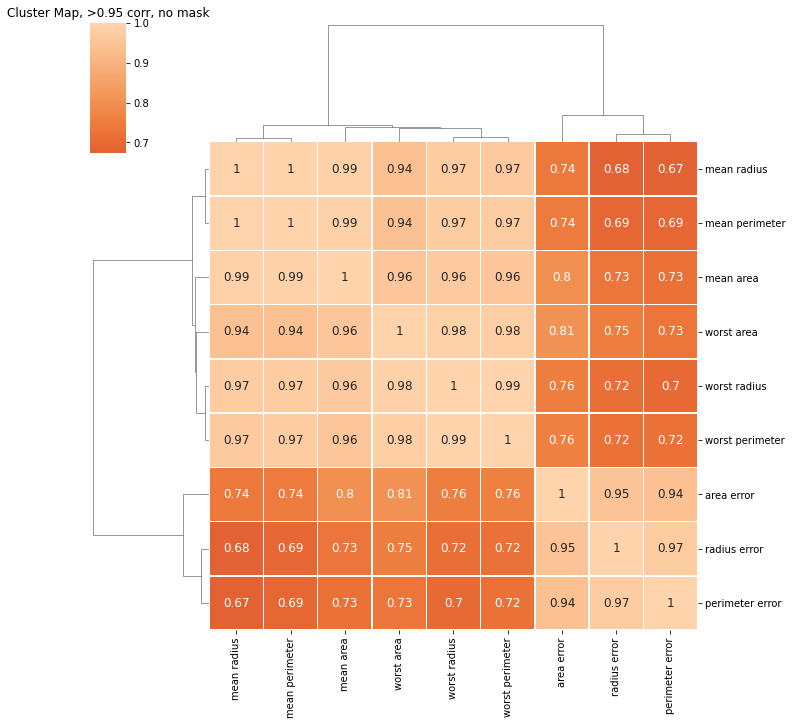

In [171]:
#a more concentrated hierachical cluster map that shows the features that have >0.95 correlation
corr_high = corr[corr > 0.95]
corr_high = corr_high.replace(1 , np.nan)
corr_high = corr_high.dropna(how = 'all', axis = 0).dropna(how = 'all', axis = 1)
columns_high_corr = list(corr_high.columns)
corr_high_sel = corr[columns_high_corr].transpose()[columns_high_corr]

sns.clustermap(corr_high_sel, figsize = (10, 10),  annot = True, annot_kws={'size':12}, center=0,
            square=True, linewidths=.5) #, cbar_kws={"shrink": .5})
plt.title('Cluster Map, >0.95 corr, no mask')

Text(0.5, 1.0, 'Cluster Map_ df, >0.95 corr, no mask')

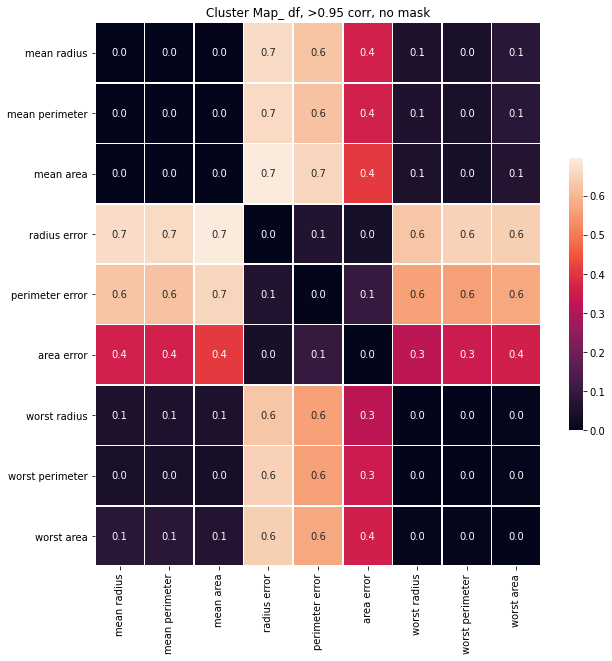

In [172]:
#how these features' corr_df look like
corr_df_sel = corr_df[columns_high_corr].transpose()[columns_high_corr]

f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(corr_df_sel, annot= True,linewidths=0.5,fmt = ".1f",ax=ax, cbar_kws={"shrink": .5})
plt.title('Cluster Map_ df, >0.95 corr, no mask')

In [0]:
#group 1 = [mean radius, mean perimeter], mean area,worst area, worst radius, worst perimeter, corr_df ~0.0; 
#group 2 = radius error, perimeter error, area error
#Keeping at least one of group 1 and group 2 present
#Manually chose the below columns
drop_columns_corr_5 = ['mean perimeter', 'mean area', 'worst perimeter', 'worst radius', 'radius error']
drop_columns_best['Manual_1']= drop_columns_corr_5

DSet_corr = Dataset(X, Y, drop_column= drop_columns_corr_5)
score_best['Manual_1'], trained_models_best['Manual_1'] = train_model_score('LR', DSet_corr)
drop_columns_best['Manual_1']= drop_columns_corr_5

In [174]:
pd.DataFrame.from_dict(score_best, orient= 'index', columns = ['Train Score', 'Test Score'])

,Train Score,Test Score
Base,0.9906,0.9580
Manual_1,0.9906,0.9720


**5.2 Filter Method: Univariate Correlation**

Univariate Correlation filter on Kendall rank correlation coefficient(Kendall's τ coefficient); 

*Guyon, I., Elisseeff, A.: An Introduction to Variable and Feature Selection. Journal of Machine Learning Research 3, 1157–1182 (2003)*

In [0]:
#Univariate filtering: Kendall's Tau for numerical input and categorical output
corr_1 = df1.corr(method = 'kendall')
drop_uni = abs(corr_1['diagnosis'])
drop_uni = drop_uni.sort_values(ascending= True)

In [176]:
drop_columns_uni = {}
score_uni = {}
trained_models_uni = {}
for i in range(0, 12):
  drop_columns_uni['LR_kendall' + str(i)] = list(drop_uni.head(i).index)
  DSet_kendall = Dataset(X, Y, drop_column= drop_columns_uni['LR_kendall' + str(i)])
  [score_uni['LR_kendall'+str(i)], trained_models_uni['LR_kendall'+str(i)] ]= train_model_score('LR', DSet_kendall)
pd.DataFrame.from_dict(score_uni, orient= 'index', columns = ['Train Score', 'Test Score'])

,Train Score,Test Score
LR_kendall0,0.9906,0.9580
LR_kendall1,0.9906,0.9580
LR_kendall2,0.9906,0.9580
LR_kendall3,0.9906,0.9650
LR_kendall4,0.9906,0.9650
LR_kendall5,0.9883,0.9650
LR_kendall6,0.9883,0.9720
LR_kendall7,0.9906,0.9790
LR_kendall8,0.9906,0.9790
LR_kendall9,0.9883,0.9860


In [0]:
#best test score accuracy - drop 10 least univariately correlated features
drop_columns_best['LR_kendall10'] = drop_columns_uni['LR_kendall10']
score_best['LR_kendall10'] = score_uni['LR_kendall10']
trained_models_best['LR_kendall10'] = trained_models_uni['LR_kendall10']

In [178]:
pd.DataFrame.from_dict(score_best, orient= 'index', columns = ['Train Score', 'Test Score'])

,Train Score,Test Score
Base,0.9906,0.9580
Manual_1,0.9906,0.9720
LR_kendall10,0.9789,0.9860


**5.3 Wrapper method: Recursive Feature Elimination**

Wrapper methods use a subset of
features and train a model which
decides whether to add or remove
features based on model
performance

In [0]:
from sklearn.feature_selection import RFE

def RFE_selection(DSet, r_min = 18, r_max = 31, drop_columns = []):
  [X_train, X_test, Y_train, Y_test] = DSet
  removed_feat_dict = {}
  score = {}
  trained_models = {}
  if len(drop_columns) > 0 :
    X_train = X_train.drop(drop_columns, axis = 1)
    X_test = X_test.drop(drop_columns, axis = 1)
  for i in range(r_min, r_max):
    estimator = LogisticRegression(random_state=0)
    selector = RFE(estimator, i , step=1)
    selector_op = selector.fit(X_train, Y_train)
    # RFE selector has attribute ranking_ that shows feature relative importance
    # print(selector_op.ranking_) 
    removed_feat_dict['RFE keep' + str(i)] = list(X_train.columns[(selector_op.support_ == False)])
    X_train_i = X_train.drop(removed_feat_dict['RFE keep' + str(i)], axis =1 )
    X_test_i = X_test.drop(removed_feat_dict['RFE keep' + str(i)], axis =1 )
    DSet_rfe = [X_train_i, X_test_i, Y_train, Y_test]
    score['RFE keep' + str(i)], trained_models['RFE keep' + str(i)] = train_model_score('LR', DSet_rfe)
  return removed_feat_dict, score, trained_models

In [180]:
[drop_columns_rfe, score_rfe, trained_models_rfe] = RFE_selection(DSet)
pd.DataFrame.from_dict(score_rfe, orient= 'index', columns = ['Train Score', 'Test Score'])

,Train Score,Test Score
RFE keep18,0.9906,0.9510
RFE keep19,0.9906,0.9510
RFE keep20,0.9906,0.9720
RFE keep21,0.9906,0.9720
RFE keep22,0.9906,0.9720
RFE keep23,0.9906,0.9650
RFE keep24,0.9906,0.9650
RFE keep25,0.9906,0.9580
RFE keep26,0.9906,0.9580
RFE keep27,0.9906,0.9580


In [0]:
#Keeping 20 gives the best result
drop_columns_best['RFE keep20'] = drop_columns_rfe['RFE keep20']
score_best['RFE keep20'] = score_rfe['RFE keep20']
trained_models_best['RFE keep20'] = trained_models_rfe['RFE keep20']

In [182]:
pd.DataFrame.from_dict(score_best, orient= 'index', columns = ['Train Score', 'Test Score'])

,Train Score,Test Score
Base,0.9906,0.9580
Manual_1,0.9906,0.9720
LR_kendall10,0.9789,0.9860
RFE keep20,0.9906,0.9720


**5.4 Embedded method - Lasso Regression**

Embedded methods combine the
qualities of filter and wrapper methods.
They are implemented by algorithms
that have their own feature selection
methods built-in.

Lasso regression is a type of linear regression that uses shrinkage. Features deemed unimportant is shrunk to zero, thereby eliminated from the input.

In [0]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# DSet = [X_train, X_test, Y_train, Y_test]
# C is the regularisation hyperfeature, larger C reflects looser regularisation 
# -- fewer features removed.
def Lasso_selection(DSet, C = 100, drop_columns = []):

  [X_train, X_test, Y_train, Y_test] = DSet

  if len(drop_columns) > 0 :
    X_train = X_train.drop(drop_columns, axis = 1)
    X_test = X_test.drop(drop_columns, axis = 1)

  sel_ = SelectFromModel(LogisticRegression(C=C, penalty='l1', 
                                            solver = 'liblinear', 
                                            max_iter= 10000))
  #Identifying important features with whole dataset (?)
  sel_.fit(X_train, Y_train)
  removed_feat = list(X.columns[(sel_.get_support() == False)])
  
  X_train_i = X_train.drop(removed_feat, axis =1 )
  X_test_i = X_test.drop(removed_feat, axis =1 )
  DSet_rfe = [X_train_i, X_test_i, Y_train, Y_test]
  score, model = train_model_score('LR', DSet_rfe)
  print(score)

  return removed_feat, score, model

In [184]:
drop_columns_lasso = {}
score_lasso = {}
trained_model_lasso = {}

for c in [1, 10, 100]:
  print('C = '+ str(c))
  [drop_columns_lasso[str(c)], score_lasso[str(c)], trained_model_lasso[str(c)]] = Lasso_selection(DSet, C=c)
  print('selected features: {}'.format(len(drop_columns_lasso[str(c)])))

C = 1
['0.9906', '0.9650']
selected features: 16
C = 10
['0.9906', '0.9720']
selected features: 7
C = 100
['0.9906', '0.9720']
selected features: 3


In [0]:
# C = 10 is the best test accuracy with most features removed
drop_columns_best['C = 10'] = drop_columns_lasso ['10']
score_best['C = 10'] = score_lasso['10']
trained_model_lasso['C = 10'] = trained_model_lasso ['10']

In [186]:
pd.DataFrame.from_dict(score_best, orient= 'index', columns = ['Train Score', 'Test Score'])

,Train Score,Test Score
Base,0.9906,0.9580
Manual_1,0.9906,0.9720
LR_kendall10,0.9789,0.9860
RFE keep20,0.9906,0.9720
C = 10,0.9906,0.9720


In [187]:
for x, y in drop_columns_best.items():
  print(x, y)

Base []
Manual_1 ['mean perimeter', 'mean area', 'worst perimeter', 'worst radius', 'radius error']
LR_kendall10 ['texture error', 'mean fractal dimension', 'smoothness error', 'symmetry error', 'fractal dimension error', 'worst fractal dimension', 'mean symmetry', 'mean smoothness', 'compactness error', 'worst symmetry']
RFE keep20 ['mean radius', 'mean smoothness', 'mean compactness', 'mean fractal dimension', 'texture error', 'smoothness error', 'concavity error', 'concave points error', 'symmetry error', 'worst compactness']
C = 10 ['mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'perimeter error', 'worst area', 'worst concave points']


**5.5 Combining best of all worlds**

Here we selectively combined the features deemed unimportant from previous methods, rationalised the results and combined qualitative/quantitative expertise to select the most fitted features 

**Final Features**: ['mean radius',
 'mean texture',
 'worst texture',
 'worst perimeter',
 'worst smoothness',
 'mean compactness',
 'mean concavity'
 'worst concavity',
 'mean concave points']



*   Both mean texture/concavity and worst texture/concavity is needed, and can't be replace with texture error; 
*   Both radius and perimeter needed to be present, presumably that define the shape in a linearly relationship and **omits the need for symmetry and area**
*   Similarly, fractal dimension doesn't affect the accuracy of trained model, presumably because the combination of radius, perimeter, and concavity, concave points is linearly correlated to the cell's fractal dimension
 


In [188]:
drop_columns_best['Conclusion'] = ['concave points error', 'concavity error', 
                                   'worst compactness', 'worst concave points', 
                                   'worst area','perimeter error', 
                                   'texture error', 'mean fractal dimension',
                                   'smoothness error','symmetry error',
                                   'fractal dimension error','mean symmetry',
                                   'worst fractal dimension',
                                   'mean smoothness', 'compactness error',
                                   'worst symmetry', 'mean perimeter',
                                   'mean area', 'worst radius', 'radius error', 'area error']
Dset_hybrid = Dataset(X, Y, drop_column= drop_columns_best['Conclusion'])
score_best['Conclusion'], trained_models_best['Conclusion'] = train_model_score('LR', Dset_hybrid )
train_model_score('SVC', Dset_hybrid )[0]


['0.9718', '0.9860']

In [189]:
pd.DataFrame.from_dict(score_best, orient= 'index', columns = ['Train Score', 'Test Score'])

,Train Score,Test Score
Base,0.9906,0.9580
Manual_1,0.9906,0.9720
LR_kendall10,0.9789,0.9860
RFE keep20,0.9906,0.9720
C = 10,0.9906,0.9720
Conclusion,0.9742,0.9930


In [0]:
# print('Dropped Columns \n')
# for x, y in drop_columns_best.items():
#   print(x, y)

In [191]:
features_selected = list(set(X.columns) - set(drop_columns_best['Conclusion']))
features_selected

['mean texture',
 'worst texture',
 'worst perimeter',
 'worst smoothness',
 'worst concavity',
 'mean concave points',
 'mean concavity',
 'mean radius',
 'mean compactness']

**Chapter 6: Conclusion**

**6.1 Base Feature - All models**

 SVC yields best result with 97.20% test accuracy on unaltered features.

However, we recommend Logistic Regression for its explainability on a binary medical problem

In [192]:
pd.DataFrame.from_dict(score_base, orient= 'index', columns = ['Train Score', 'Test Score'])

,Train Score,Test Score
LR,0.9906,0.9580
DTC,1.0000,0.9580
RFC,0.9906,0.9510
SVC,0.9859,0.9720
NN,0.9742,0.9510


**6.2 Feature Selection - Logistic Regression, best result with 99.30% test accuracy**

Final Features: ['mean radius', 'mean texture', 'worst texture', 'worst perimeter', 'worst smoothness', 'mean compactness', 'mean concavity' 'worst concavity', 'mean concave points']

Our analysis show that the use of the above final features are the instrumental in diagnosing breast cancer with high accuracy

In [193]:
pd.DataFrame.from_dict(score_best, orient= 'index', columns = ['Train Score', 'Test Score'])

,Train Score,Test Score
Base,0.9906,0.9580
Manual_1,0.9906,0.9720
LR_kendall10,0.9789,0.9860
RFE keep20,0.9906,0.9720
C = 10,0.9906,0.9720
Conclusion,0.9742,0.9930


In [194]:
conf_matrix = confusion_matrix(Y_test, trained_models_best['Conclusion'].predict(X_test.drop(columns = drop_columns_best['Conclusion'])))
print('Confusion_matrix')
print(conf_matrix)

Confusion_matrix
[[90  0]
 [ 1 52]]


In [195]:
print('Classification_report')
print(classification_report(Y_test, trained_models_best['Conclusion'].predict(X_test.drop(columns = drop_columns_best['Conclusion']))))

Classification_report
              precision    recall  f1-score   support

           B       0.99      1.00      0.99        90
           M       1.00      0.98      0.99        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



Confusion Matrix Interpretation

```
[[TN(benign, tested benign), FP(benign, tested malignant)],
[FN(malignant, tested benign), TP(malignant, tested malignant)]]
```

*  99.3% accuracy
*  100% specificity (B-recall), all that are truly benign are identified as benign. 
*  98% sensitivity (M-recall), 98% of diseased individuals are tested positive.
*  2% missing of diseased individuals are tested negative, 1% of all benign results are giving a false negative.
*  100% precision, all that are tested positive are actually positive. 

**Best use for the current model: It's an ideal candidate as an aid to reconfirm malignant diagnosis, adding evidence to doctors' diagnosis of cancer.**

**6.3 Next Steps**

Without more specification from you, we have created the above analysis using accuracy as the reference metric.

Here the question remains, would you prioritise eliminating false positive or false negative?

Given the agile solution we offer, we'd love to get your feedback on which metric you wish to prioritise, understand a little more about what's your goal in productionising the solution, and have access to your priopriatory database to train the model. 

We are happy to follow up with further feature selection and model fine tuning process to fit your goal. 




Thank you,

Muna Ali, Imy Hirsh, Zoe Qin